In [30]:

# For data manipulation 
import numpy as np 
import pandas as pd 

# For data visualization 
import matplotlib.pyplot as plt 
import seaborn as sns 
# For displaying all of the columns in dataframes 
pd.set_option('display.max_columns', None) 

# For data modeling 
from xgboost import XGBClassifier 
from xgboost import XGBRegressor 
from xgboost import plot_importance 
from sklearn.linear_model import LogisticRegression 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier 

# For metrics and helpful functions 
from sklearn.model_selection import GridSearchCV, train_test_split 
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import f1_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import roc_auc_score, roc_curve,classification_report 
from sklearn.tree import plot_tree 

# For saving models 
import pickle 


In [31]:
# import os library
import os
 
# change the current directory
# to specified directory
os.chdir(r"E:\Google Advanced Data Analytics Certificate courses\Capstone project")
 
print("Directory changed")

Directory changed


In [32]:
# Load the dataset 
# Load dataset into a dataframe 
df0 = pd.read_csv("E:\Google Advanced Data Analytics Certificate courses\Capstone project\HR_Sailfort_dataset.csv") 
# Display first few rows of the dataframe 
df0.head() 

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [38]:
# 2.3.1 Gather basic information about the data 
df0.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_monthly_hours  14999 non-null  int64  
 4   tenure                 14999 non-null  int64  
 5   work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [40]:
#2.3.2 Gather descriptive statistics about the data 
# Undestanding the data based descriptive statistics 

df0.describe() 

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [34]:
# Display all column names 

df0.columns 

# Rename columns as needed 

df0 = df0.rename(columns={'Work_accident': 'work_accident', 
'average_montly_hours': 'average_monthly_hours', 
'time_spend_company': 'tenure', 
'Department': 'department'}) 

# Display all column names after the update 

df0.columns


Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_monthly_hours', 'tenure', 'work_accident', 'left',
       'promotion_last_5years', 'department', 'salary'],
      dtype='object')

In [35]:
# 2.3.4 Check missing values 
df0.isna().sum() 

satisfaction_level       0
last_evaluation          0
number_project           0
average_monthly_hours    0
tenure                   0
work_accident            0
left                     0
promotion_last_5years    0
department               0
salary                   0
dtype: int64

There are no missing values in the data. 

2.3.5 Check duplicates : Checking for any duplicate entries in the data.

In [29]:
# Count of duplicated rows 
df0[df0.duplicated()].count()

satisfaction_level       3008
last_evaluation          3008
number_project           3008
average_monthly_hours    3008
tenure                   3008
work_accident            3008
left                     3008
promotion_last_5years    3008
department               3008
salary                   3008
dtype: int64

There are 3008 duplicated rows found in the dataset. That is 20% of the data. 
The above output shows the first five occurences of rows that are duplicated farther down in the dataframe.

In [22]:
df0[df0.duplicated()].head() 

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
396,0.46,0.57,2,139,3,0,1,0,sales,low
866,0.41,0.46,2,128,3,0,1,0,accounting,low
1317,0.37,0.51,2,127,3,0,1,0,sales,medium
1368,0.41,0.52,2,132,3,0,1,0,RandD,low
1461,0.42,0.53,2,142,3,0,1,0,sales,low


* Dulpicates provided dulpicated information, dropping duplicates doesn't affect the dataset.
* The following code drops duplicates and save the result to new dataframe df1

In [36]:
df1 = df0.drop_duplicates(keep='first') 

In [37]:
df1.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


2.3.6 Check outliers 

Check for outliers in the data.


<function matplotlib.pyplot.show(close=None, block=None)>

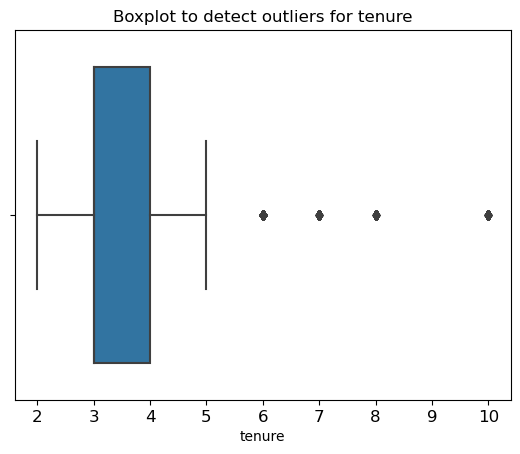

In [41]:
# Create a boxplot to visualize distribution of `tenure` and detect any outliers plt.figure(figsize=(6,6)) 
plt.title('Boxplot to detect outliers for tenure', fontsize=12) 
plt.xticks(fontsize=12) 
plt.yticks(fontsize=12) 
sns.boxplot(x=df1['tenure']) 
plt.show

The boxplot above shows that there are outliers in the tenure variable. 

It would be helpful to investigate how many rows in the data contain outliers in the tenure column. 


In [43]:
# Determine the number of rows containing outliers 
### YOUR CODE HERE ### 
# Compute the 25th percentile value in `tenure` 
percentile25 = df1['tenure'].quantile(0.25) 
# Compute the 75th percentile value in `tenure` 
percentile75 = df1['tenure'].quantile(0.75) 
# Compute the interquartile range in `tenure` 
iqr = percentile75 - percentile25 
9
# Define the upper limit and lower limit for non-outlier values in `tenure` upper_limit = percentile75 + 1.5 * iqr 
lower_limit = percentile25 - 1.5 * iqr 
upper_limit = percentile75+1.5*iqr
print("Lower limit:", lower_limit) 
print("Upper limit:", upper_limit) 
# Identify subset of data containing outliers in `tenure` 
outliers = df1[(df1['tenure'] > upper_limit) | (df1['tenure'] < lower_limit)] 
# Count how many rows in the data contain outliers in `tenure` 
print("Number of rows in the data containing outliers in `tenure`:",len(outliers))

Lower limit: 1.5
Upper limit: 5.5
Number of rows in the data containing outliers in `tenure`: 824


In [45]:
# Get percentages of people who left vs. stayed 
dist= df1['left'].value_counts(normalize=True)
print(df1['left'].value_counts(normalize=True)) 


0    0.833959
1    0.166041
Name: left, dtype: float64


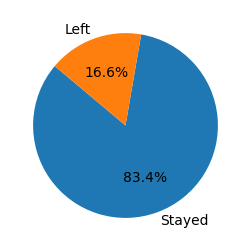

In [59]:
plt.figure(figsize=(3,3))
labels=['Stayed','Left']

plt.pie(dist,labels=labels,autopct='%1.1f%%',startangle=140);

Data visualizations 

* Distributions within data:Box plots are very useful in visualizing distributions within data

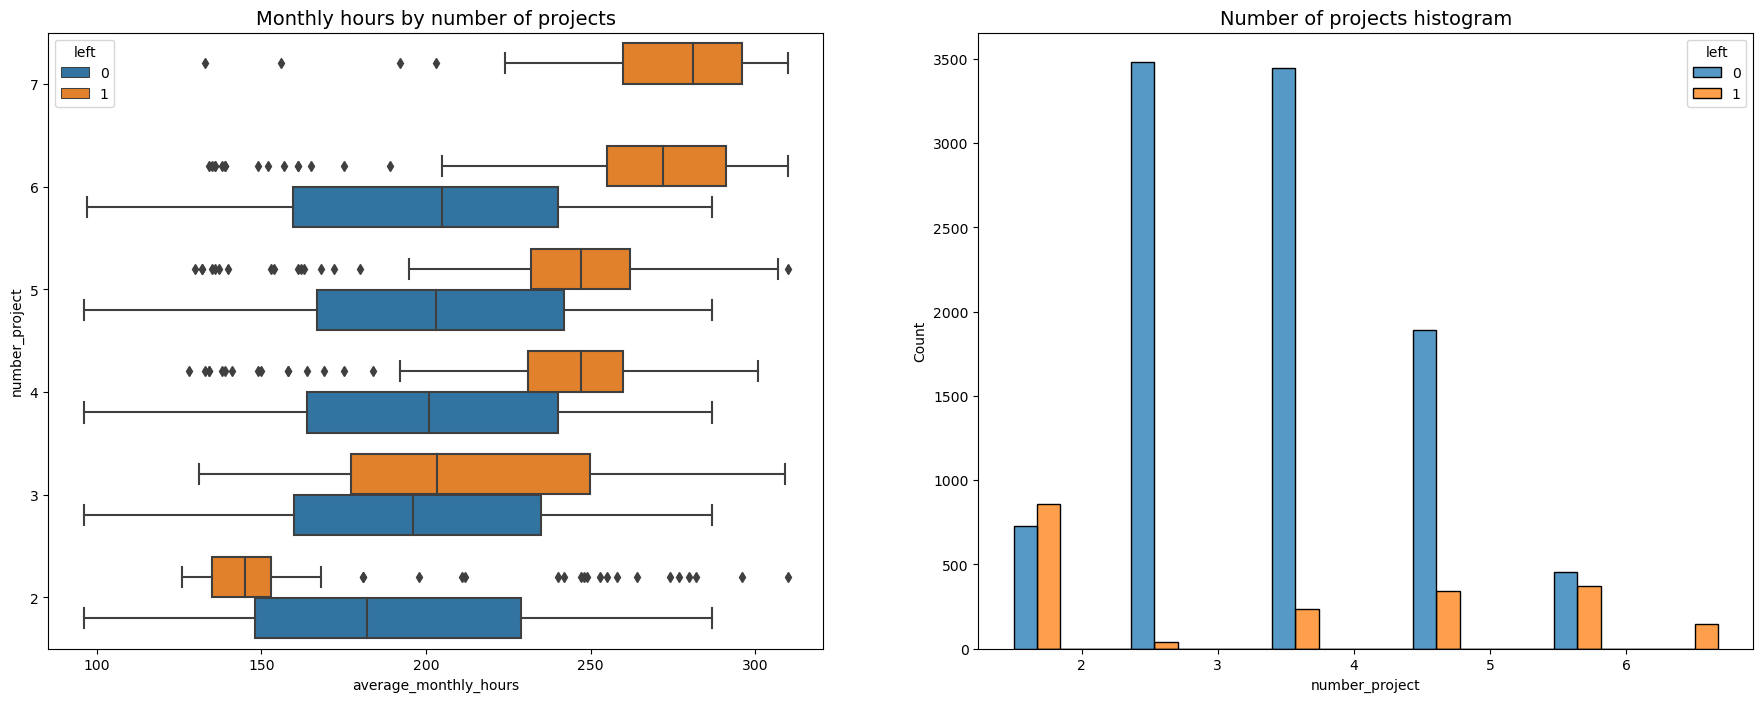

In [60]:
# Set figure and axes 
fig, ax = plt.subplots(1, 2, figsize = (22,8)) 

# Boxplot showing `average_monthly_hours` distributions for comparing employees who stayed versus those who left 

sns.boxplot(data=df1, x='average_monthly_hours', y='number_project',hue='left', orient="h", ax=ax[0]) 

ax[0].invert_yaxis() 
ax[0].set_title('Monthly hours by number of projects', fontsize='14') 

# Create histogram showing distribution of `number_project`, comparing␣ ,employees who stayed versus those who left 
tenure_stay = df1[df1['left']==0]['number_project'] 
tenure_left = df1[df1['left']==1]['number_project'] 
sns.histplot(data=df1, x='number_project', hue='left', multiple='dodge',shrink=2, ax=ax[1]) 
ax[1].set_title('Number of projects histogram', fontsize='14') 

# Display the plots 
plt.show() 

It might be natural that people who work on more projects would also work longer hours. This appears to be the case here, with the mean hours of each group (stayed and left) increasing with number of projects worked. However, a few things stand out from this plot.

There are two groups of employees who left the company: (A) those who worked considerably less than their peers with the same number of projects, and (B) those who worked much more. Of those in group A, it’s possible that they were fired. It’s also possible that this group includes employees who had already given their notice and were assigned fewer hours because they were already on their way out the door. For those in group B, it’s reasonable to infer that they probably quit. The folks in group B likely contributed a lot to the projects they worked in; they might have been the largest contributors to their projects.

Everyone with seven projects left the company, and the interquartile ranges of this group and those who left with six projects was ~255–295 hours/month—much more than any other group.

The optimal number of projects for employees to work on seems to be 3–4. The ratio of left/stayed is very small for these cohorts.

If you assume a work week of 40 hours and two weeks of vacation per year, then the average number of working hours per month of employees working Monday–Friday = 50 weeks * 40 hours per week / 12 months = 166.67 hours per month. This means that, aside from the employees who worked on two projects, every group—even those who didn’t leave the company—worked considerably more hours than this. It seems that employees here are overworked.

In [61]:
# Get value counts of stayed/left for employees with 7 projects 
df1[df1['number_project']==7]['left'].value_counts() 


1    145
Name: left, dtype: int64

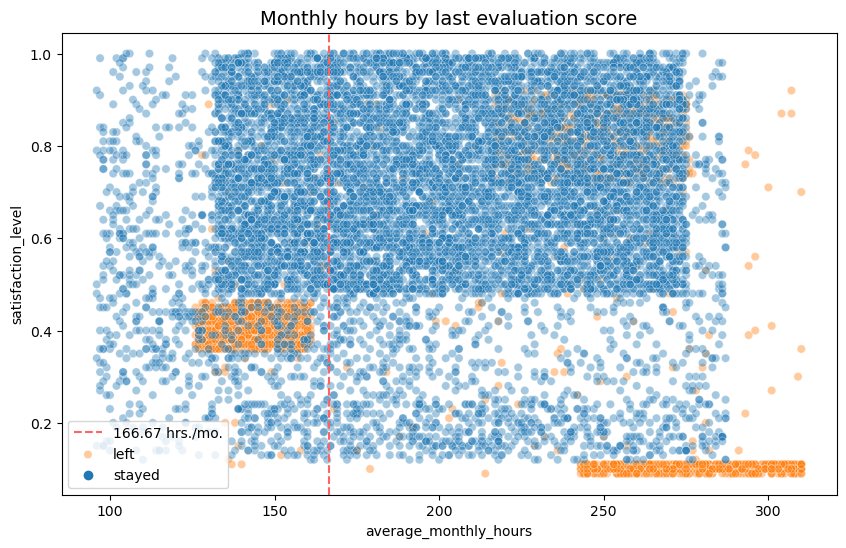

In [66]:

# Create scatterplot of `average_monthly_hours` versus `satisfaction_level`,comparing employees who stayed versus those who left 
plt.figure(figsize=(10, 6)) 
sns.scatterplot(data=df1, x='average_monthly_hours', y='satisfaction_level',hue='left', alpha=0.4) 
plt.axvline(x=166.67, color='#ff6361', label='166.67 hrs./mo.', ls='--') 
plt.legend(labels=['166.67 hrs./mo.', 'left', 'stayed']) 
plt.title('Monthly hours by last evaluation score', fontsize='14'); 

This confirms that all employees with 7 projects did leave. 

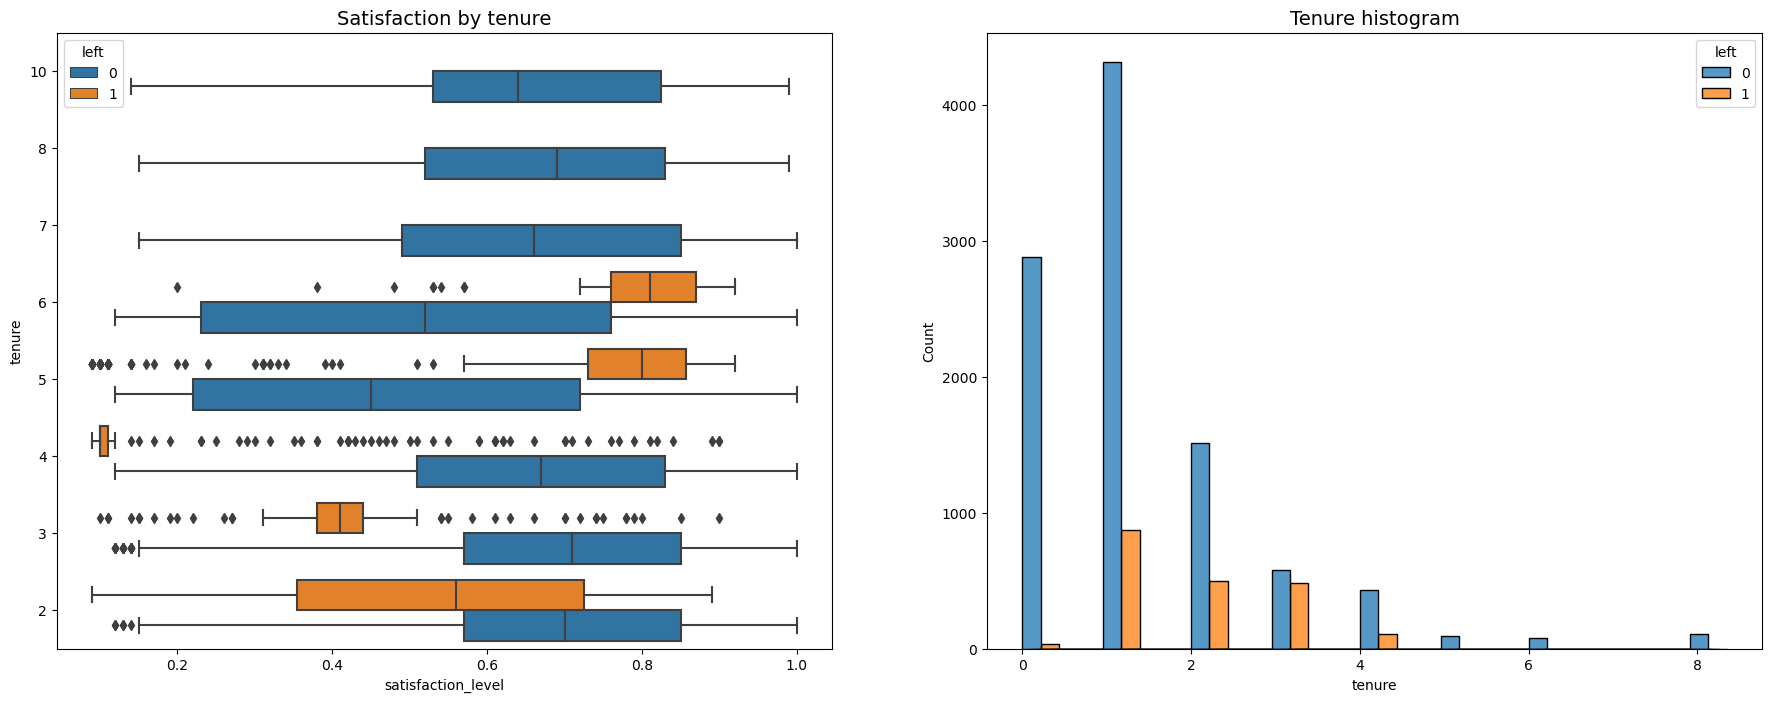

In [68]:

# Set figure and axes 
fig, ax = plt.subplots(1, 2, figsize = (22,8)) 

# Create boxplot showing distributions of `satisfaction_level` by tenure,comparing employees who stayed versus those who left 

sns.boxplot(data=df1, x='satisfaction_level', y='tenure', hue='left',orient="h", ax=ax[0]) 
ax[0].invert_yaxis() 
ax[0].set_title('Satisfaction by tenure', fontsize='14') 

# Create histogram showing distribution of `tenure`, comparing employees who stayed versus those who left 
tenure_stay = df1[df1['left']==0]['tenure'] 
tenure_left = df1[df1['left']==1]['tenure'] 
sns.histplot(data=df1, x='tenure', hue='left', multiple='dodge', shrink=5,ax=ax[1]) 
ax[1].set_title('Tenure histogram', fontsize='14') 
plt.show(); 

* There are many observations we could make from this plot. - Employees who left fall into two general categories: dissatisfied employees with shorter tenures and very satisfied employees with medium-length tenures. 
Four-year employees who left seem to have an unusually low satisfaction level. It’s worth investigating changes to company policy that might have affected people specifically at the four-year mark, if possible. 
The longest-tenured employees didn’t leave. Their satisfaction levels aligned with those of newer employees who stayed. - The histogram shows that there are relatively few longer-tenured employees. It’s possible that they’re the higher-ranking, higher-paid employees. 


In [69]:
# Calculate mean and median satisfaction scores of employees who left and those who stayed 
df1.groupby(['left'])['satisfaction_level'].agg([np.mean,np.median]) 

,mean,median
left,,
0,0.667365,0.69
1,0.440271,0.41


As expected, the mean and median satisfaction scores of employees who left are lower than those of employees who stayed. Interestingly, among employees who stayed, the mean satisfaction score appears to be slightly below the median score. This indicates that satisfaction levels among those who stayed might be skewed to the left.

* We could examine salary levels for different tenures.

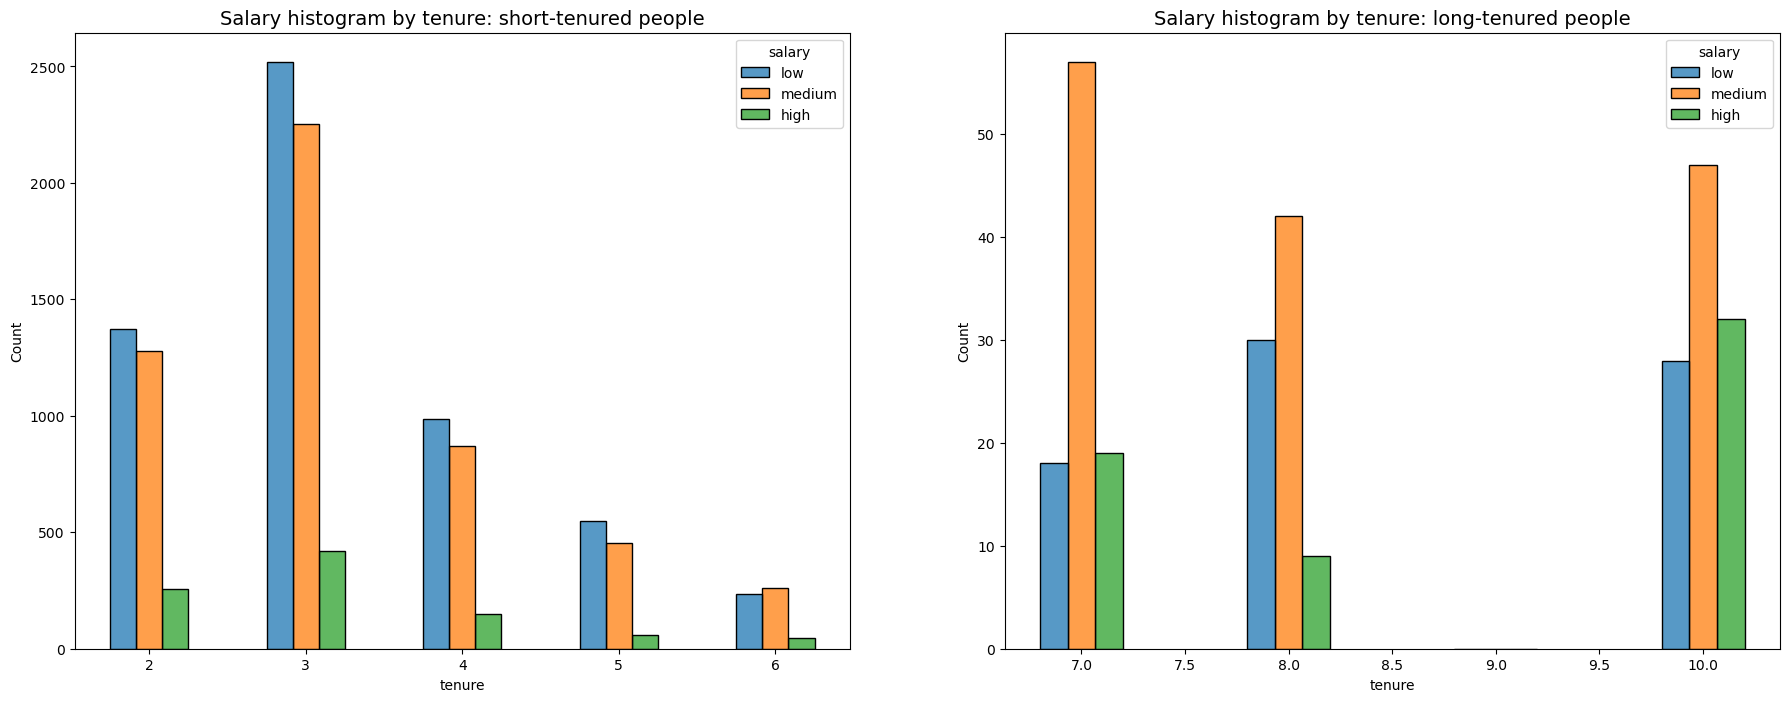

In [70]:

# Set figure and axes 
fig, ax = plt.subplots(1, 2, figsize = (22,8)) 

# Define short-tenured employees 
tenure_short = df1[df1['tenure'] < 7] 

# Define long-tenured employees 
tenure_long = df1[df1['tenure'] > 6] 

# Plot short-tenured histogram 
sns.histplot(data=tenure_short, x='tenure', hue='salary', discrete=1, hue_order=['low', 'medium', 'high'], multiple='dodge', shrink=.5,ax=ax[0]) 
ax[0].set_title('Salary histogram by tenure: short-tenured people',fontsize='14') 

# Plot long-tenured histogram 
sns.histplot(data=tenure_long, x='tenure', hue='salary', discrete=1, hue_order=['low', 'medium', 'high'], multiple='dodge', shrink=.4,ax=ax[1]) 

ax[1].set_title('Salary histogram by tenure: long-tenured people',fontsize='14'); 


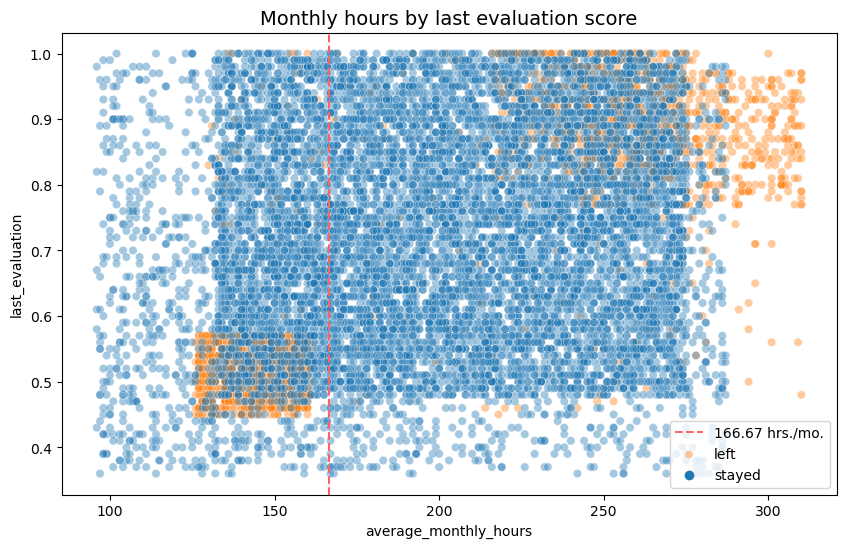

In [72]:

# Create scatterplot of `average_monthly_hours` versus `last_evaluation` 
plt.figure(figsize=(10, 6)) 
sns.scatterplot(data=df1, x='average_monthly_hours', y='last_evaluation',hue='left', alpha=0.4) 

plt.axvline(x=166.67, color='#ff6361', label='166.67 hrs./mo.', ls='--') 
plt.legend(labels=['166.67 hrs./mo.', 'left', 'stayed']) 
plt.title('Monthly hours by last evaluation score', fontsize='14'); 


* Do they have any promotional incentives?

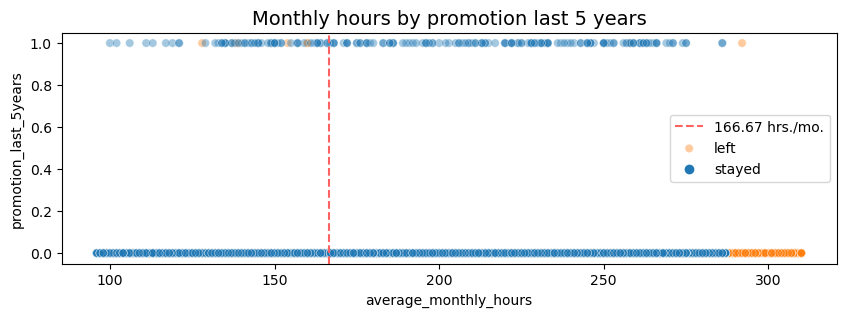

In [76]:
# Create plot to examine relationship between `average_monthly_hours` and␣ ,→`promotion_last_5years` 
plt.figure(figsize=(10, 3)) 
sns.scatterplot(data=df1, x='average_monthly_hours', y='promotion_last_5years',hue='left', alpha=0.4) 

plt.axvline(x=166.67, color='#ff6361', ls='--') 
plt.legend(labels=['166.67 hrs./mo.', 'left', 'stayed']) 
plt.title('Monthly hours by promotion last 5 years', fontsize='14'); 

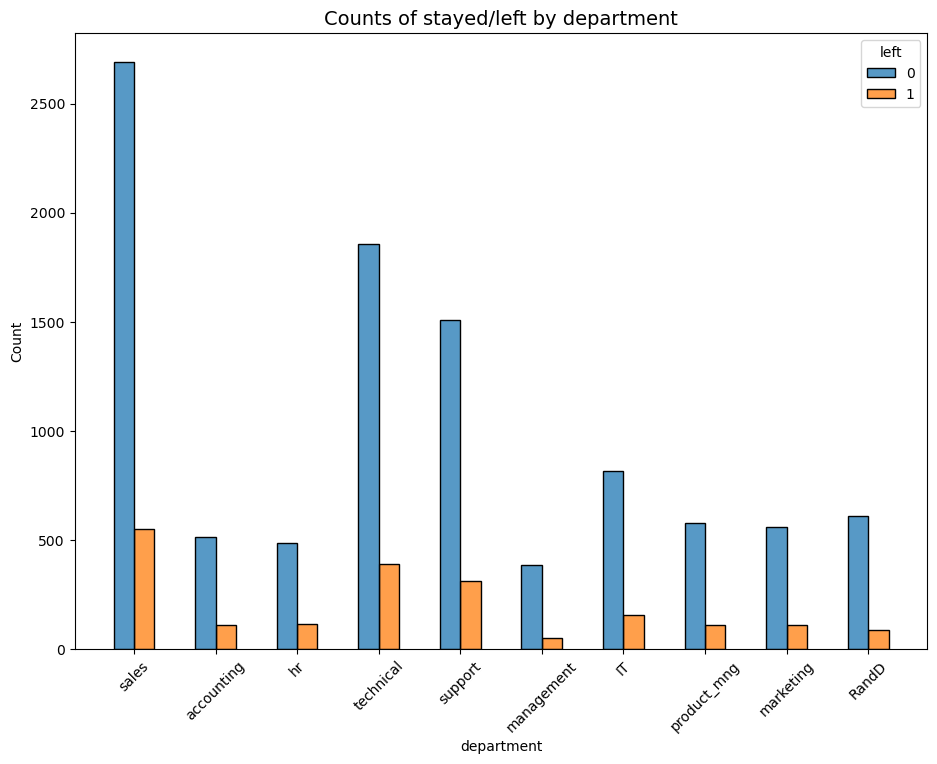

In [77]:
# Create stacked histogram to compare department distribution of employees who left to that of employees who didn't 

plt.figure(figsize=(11,8)) 
sns.histplot(data=df1, x='department', hue='left', 
             discrete=1, 
             hue_order=[0, 1], 
             multiple='dodge', 
             shrink=.5) 

plt.xticks(rotation='45') 
plt.title('Counts of stayed/left by department', fontsize=14); 

19

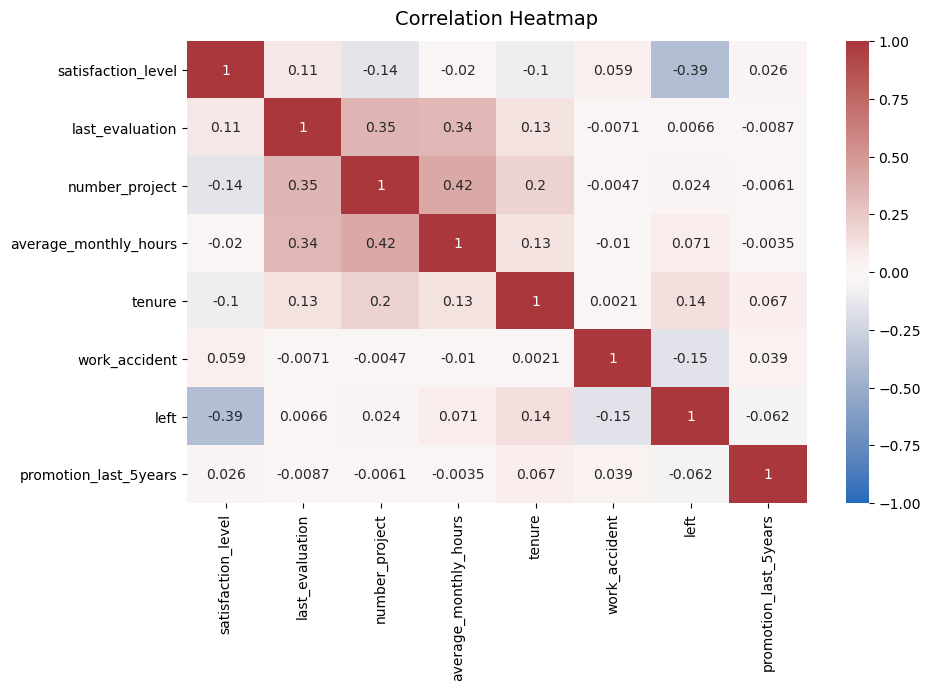

In [79]:
# detect correlation between varaiables using heatmap 

plt.figure(figsize=(10, 6)) 
heatmap = sns.heatmap(df0.corr(), vmin=-1, vmax=1, annot=True, 
                      cmap=sns.color_palette("vlag", 
                      as_cmap=True)) 

heatmap.set_title('Correlation Heatmap', 
                  fontdict={'fontsize':14}, 
                  pad=12); 19


## 3. Model building 
* goal is to predict whether an employee leaves the company, which is a categorical outcome variable.
  So this task involves classification. More specifically, this involves binary classification, since the outcome variable left can be either 1 (indicating employee left) or 0 (indicating employee didn’t leave).
* Identify the types of models most appropriate for this task.Since the variable we want to predict (whether an employee leaves the company) is categorical,
  we could either build a Logistic Regression model, or a Tree-based Machine Learning model

### Modeling Approach A: Logistic Regression Model
Logistic regression Note that binomial logistic regression suits the task because it involves binary classification. 
Before splitting the data, encode the non-numeric variables. There are two: department and salary. 
department is a categorical variable, which means you can dummy it for modeling. 
salary is categorical too, but it’s ordinal. There’s a hierarchy to the categories, so it’s better not to dummy this column, but rather to convert the levels to numbers, 0–2. 


In [80]:
 # Copy the dataframe 
df_enc = df1.copy() 
# Encode the `salary` column as an ordinal numeric category 
df_enc['salary'] = ( 
df_enc['salary'].astype('category').cat.set_categories(['low', 'medium', 'high']).cat.codes) 

# Dummy encode the `department` column 
df_enc = pd.get_dummies(df_enc, drop_first=False) 

# Display the new dataframe 
df_enc.head() 


,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0
1,0.80,0.86,5,262,6,0,1,0,1,0,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,1,0,1,0,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,1,0,0,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0


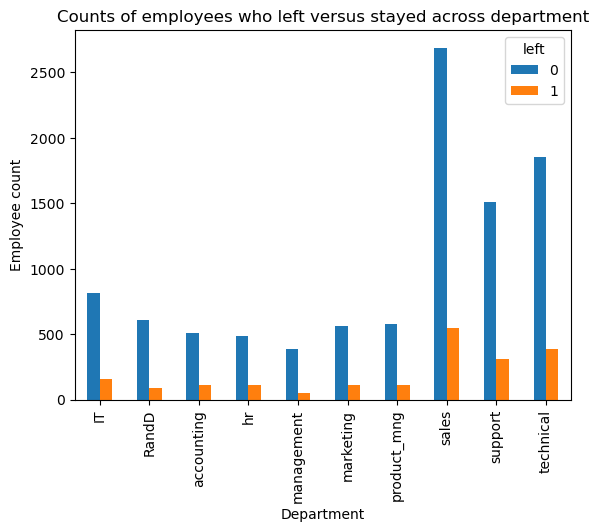

In [83]:
#Create a stacked bart plot to visualize number of employees across department, comparing those who left with those who didn't 
# In the legend, 0 (blue color) represents employees who did not leave, 1 (orange color) represents employees who left 
pd.crosstab(df1['department'],
             df1['left']).plot(kind ='bar')
plt.title('Counts of employees who left versus stayed across department') 
plt.ylabel('Employee count') 
plt.xlabel('Department') 
plt.show() 
